In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
# question 1:
from iteration import iteration

npoints = 1000 
real, imag = np.linspace(-2, 2, npoints), np.linspace(-2, 2, npoints)
col = np.array([complex(x, y) for x in real for y in imag]) 

colour_array = np.array([iteration(c) for c in col])

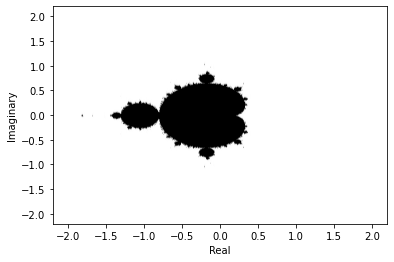

In [4]:
# plot 1
# values of -1 (convergence) are black, and any higher values (divergence) are white
plt.scatter(col.real, col.imag, c=colour_array, cmap=plt.cm.get_cmap('binary_r'), vmin=-1, vmax=1)
plt.xlabel('Real'), plt.ylabel('Imaginary')
plt.savefig('iteration_bw.pdf')

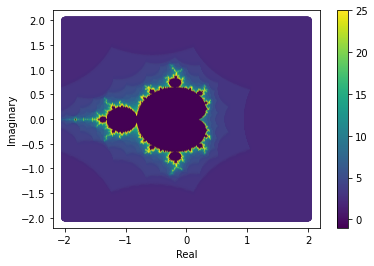

In [5]:
# plot 2
plt.scatter(col.real, col.imag, c=colour_array, cmap=plt.cm.get_cmap(), vmin=-1, vmax=25)
plt.xlabel('Real'), plt.ylabel('Imaginary')
plt.colorbar() 
plt.savefig('iteration_colour.pdf')

In [ ]:
#Question 2:
def lorenz_eq(t, XYZ, sigma, r, b):
    """
    lorenz_eq(t, xyz, sigma, r, b):
    
    The Lorenz equations are given by:
    dx/dt = -sigma(X - Y)
    dy/dt = rX - y - XZ
    dz/dt = -bZ + XY
    
    An ode solver is used to solve these equations for a set of initial equations.
    
    Parameters:
    t: float
    The time to integrate, using scipy.integrate.solve_ivp()
    xyz: 3-tuple of floats
    The values of X, Y, Z for the iteration of the Lorenz equations.
    sigma: float
    The Prandtl number
    r: float
    The Rayleigh number
    b: float
    The length scale 
    
    Returns
    ---------
    [dx, dy, dz]: array of floats
    The derrrivatives with respect to time of X, Y, Z, given by the lornez equations.
    
    
    """
    X, Y, Z = XYZ  
    
    dx = -sigma*(X - Y)
    dy = (r*X) - Y  - (X*Z)
    dz = -(b*Z) + (X * Y)
    
    return [dx, dy, dz]

span_t = [0., 61.]  # we are integrating for t=60
w0 = [0., 1., 0.]  # values for w0
params = (10., 28., 8./3.)  # the parameters sigma, r, b


lorenz_sol = solve_ivp(lorenz_eq, span_t, w0, args=params, dense_output=True)

# To reproduce figure 1:
n_it = 6000  # use 60000 iterations
times = np.linspace(span_t[0], span_t[-1], n_it)  # array of times to plot over
dt = 0.01  


ns = times/dt  

Xs, Ys, Zs = lorenz_sol.sol(times)


In [ ]:
# plotting figure 1:
fig, (yax_1, yax_2, yax_3) = plt.subplots(3, 1, sharex=True)
# plot the first 3000 steps of iteration in the same way as Lorenz in paper
yax_1.plot(ns[0:1000], Ys[0:1000])
plt.xlabel("Iteration")
yax_1.set_ylabel('Y')
yax_2.set_ylabel('Y')
yax_3.set_ylabel('Y')
yax_2.plot(ns[0:1000], Ys[1000:2000])
yax_3.plot(ns[0:1000], Ys[2000:3000])  
plt.savefig('Figure1.pdf')

In [ ]:
# plotting figure 2:
times_2 = np.linspace(14, 19, n_it)

ns2 = times_2/dt

xs2, ys2, zs2 = lorenz_sol.sol(times_2)


# plotting like Lorenz's Fig. 2
fig, (yz_ax, xy_ax) = plt.subplots(2, 1)

yz_ax.plot(ys2, zs2)
yz_ax.set_xlabel('Y'), yz_ax.set_ylabel('Z')

xy_ax.plot(xs2, ys2)
xy_ax.set_xlabel('X'), xy_ax.set_ylabel('Y')
plt.savefig('Figure_2.pdf')

In [ ]:
w0_prime = [a + b for a, b in zip(w0, [0, 1e-8, 0])]

lorenz_sol_prime = solve_ivp(lorenz_eq, span_t, w0_prime, args=params, dense_output=True)

ws = lorenz_sol.sol(times)
w_primes = lorenz_sol_prime.sol(times)
# Calculate the distance between w and w_prime, and subtract the w and w_prime vectors.
# Take the norm of each vector as the distance between them.
distances = np.array([np.linalg.norm(vec) for vec in ws.T - w_primes.T])

In [ ]:
# plotting:
plt.yscale('log')  
plt.plot(times, distances)
plt.xlabel('Time')
plt.ylabel('Seperation between W and W_Prime')
plt.savefig('w_prime_distance.pdf')